In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

url = '../../Data/bikeshare.csv'

bikeshare_csv = pd.read_csv(url)
# - instant: record index
# - dteday : date
# - season : season (1:springer, 2:summer, 3:fall, 4:winter)
# - yr : year (0: 2011, 1:2012)
# - mnth : month ( 1 to 12)
# - hr : hour (0 to 23)
# - holiday : weather day is holiday or not (extracted from [Web Link])
# - weekday : day of the week
# - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
# + weathersit : 
# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# - temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
# - atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
# - hum: Normalized humidity. The values are divided to 100 (max)
# - windspeed: Normalized wind speed. The values are divided to 67 (max)
# - casual: count of casual users
# - registered: count of registered users
# - cnt: count of total rental bikes including both casual and registered

In [6]:
bikeshare = bikeshare_csv.drop(['instant', 'dteday'], axis=1)
bikeshare.head()
bikeshare.dtypes

season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
# cleaned up, for the most part. 

bikeshare.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


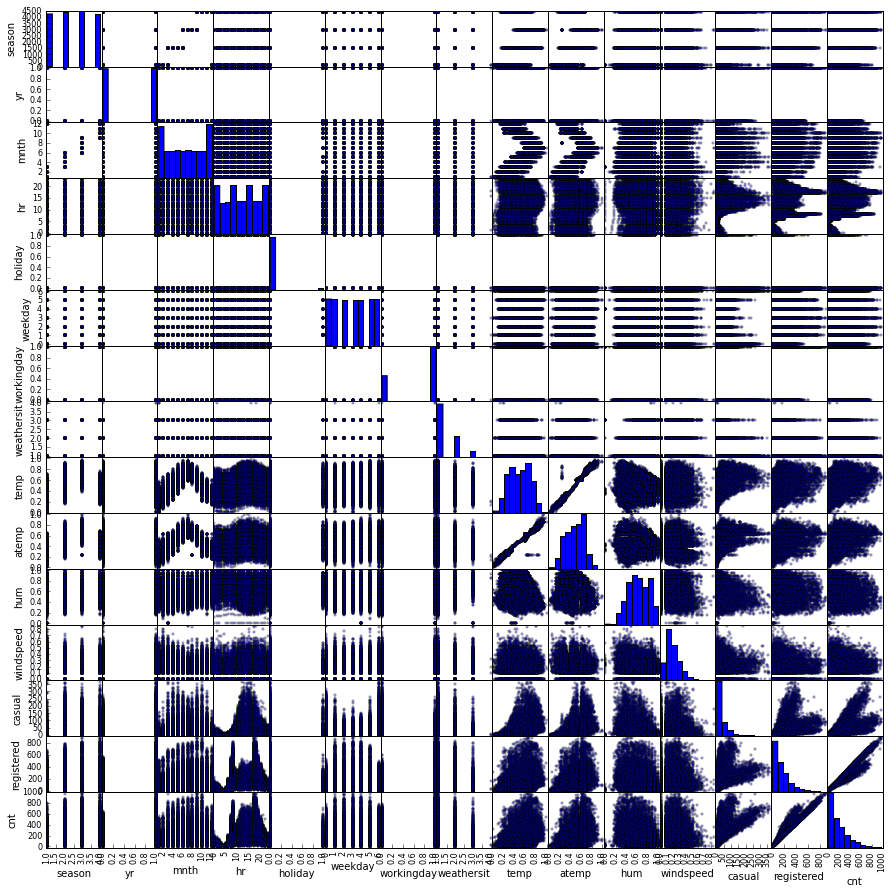

In [10]:
# pd.scatter_matrix(bikeshare, alpha=0.3, figsize=(15,15));

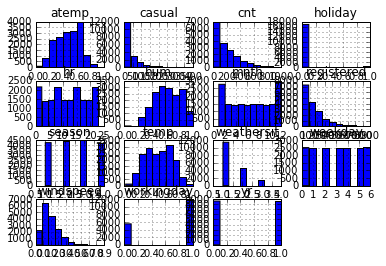

In [12]:
bikeshare.hist();

In [22]:
# perform some calculations
print type(bikeshare)
print type(bikeshare['hr'])

bikeshare['hr'].value_counts().sort_index()

rush_hour = ((bikeshare['hr'] >= 6) & (bikeshare['hr'] <= 9) | (bikeshare['hr'] >= 16) & 
             (bikeshare['hr'] <= 19)).astype(np.int)
rush_hour.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


0    False
1    False
2    False
3    False
4    False
Name: hr, dtype: bool

In [38]:
# split the data into train/test sets:


# original features - features = ['temp', 'atemp', 'hum', 'workingday', 'hr', 'weathersit']
#features = ['temp', 'atemp', 'hum', 'workingday', 'hr', 'weathersit', 'rush_hour']
#target = ['cnt']

#X = bikeshare[features]
#Y = bikeshare[target]


#N, M = X.shape

# bikeshare.loc[rows,cols]
#X_train = X.loc[:(N/2), :]
#Y_train = Y.loc[:(N/2), :]

#X_test = X.loc[((N/2)+1):, :]
#Y_test = Y.loc[((N/2)+1):, :]

#X_train.head()
#Y_train.head()

In [39]:
# split the data into train/test sets, polynomial edition
from sklearn.preprocessing import PolynomialFeatures

# original features - features = ['temp', 'atemp', 'hum', 'workingday', 'hr', 'weathersit']
features = ['atemp', 'hum', 'workingday', 'hr', 'rush_hour', 'weathersit']
target = ['cnt']

X = bikeshare[features]
y = bikeshare[target]

poly_features = PolynomialFeatures(degree=2)

X = poly_features.fit_transform(X)
N, M = X.shape

# bikeshare.loc[rows,cols]
X_train = X[:(N/2)]
y_train = y.loc[:((N/2)-1), :]

X_test = X[(N/2):]
y_test = y.loc[(N/2):, :]

print "TRAINING DATASET:"
print "X TRAIN", X_train.shape
print "Y Train", y_train.shape

print "Testing Dataset:"
print "X test", X_test.shape
print "y test", y_test.shape

KeyError: "['rush_hour'] not in index"

In [37]:
from sklearn.preprocessing import OneHotEncoder

# one-hot encoding: 
X['weathersit'].value_counts()

ohe = OneHotEncoder(sparse=True)
print type(X['weathersit']) # Series
print type(X.weathersit) # Series
print type(X[['weathersit']]) # DATAFRAME

X_encoded = ohe.fit_transform(X[['weathersit']].values)


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [29]:
#make a model and run some algorithms! 

from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()

linear_regressor.fit(X_train, Y_train)

print "COEF: ", linear_regressor.coef_
print "INTERCEPT: ", linear_regressor.intercept_

COEF:  [[ 136.85540089  154.38887413 -127.65448381   -1.04211821    6.02962424
    -4.81797011]]
INTERCEPT:  [ 24.35143458]


In [30]:
print linear_regressor.score(X_train, Y_train)

print linear_regressor.score(X_test, Y_test)

0.367084202824
0.139310628348


In [ ]:
#not so good! zero means no fit, 1 is perfect fit
ridge_regressor = linear_model.RidgeCV([0.1,1.,10.])
ridge_regressor.